# BIOS512 Assignment #3

Import the 📈Tidyverse into your `R` session

In [51]:
library('tidyverse')
library('ggrepel')

In this assignment we'll be using data from the [TidyTuesday Project](https://github.com/rfordatascience/tidytuesday). Specifically, we'll investigate vaccination rates at US schools. A `CSV` file of the data is located at:  

[https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv](https://github.com/rfordatascience/tidytuesday/blob/master/data/2020/2020-02-25/measles.csv)

Get the "raw" data URL and import it into your `R` session using `read_csv`. Remember to capture the data under a variable name of your choosing!

In [31]:
data_url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/master/data/2020/2020-02-25/measles.csv'

measles_data = read_csv(data_url, col_types = cols())
head(measles_data)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168


The `mmr` column has holds 🤒 measles, mumps, rubella 🤒 vaccination rates for students in each respective school. **If the `mmr` value is not available for a school the `mmr` value is set to -1 in this data set.** 

The target `mmr` vaccination rate as [recommended by the CDC](https://www.cdc.gov/mmwr/preview/mmwrhtml/mm5632a3.htm) for schools is 95%. 

**Calculate the fraction of schools per state that have vaccination rates greater than the CDC 95%. Capture the output as a table called `df_vacc_rates`.**

You'll need to do use `filter`, `group_by`, and `summarize`. 

I.e.
1. Filter out schools that don't report `mmr` vaccination rate (keep schools where `mmr >= 0`).
1. Group the data by `state`.
1. Summarize fracion of vaccination rates above 95%.

💡Remember `n()` stands for the number or records in a group. Also, `sum(mmr >= 95, na.rm=TRUE)` will count the number of values above or equal to 95.💡

In [14]:
# create the df_vacc_rates here

df_vacc_rates = measles_data |> 
                    filter(mmr >=0) |>
                    group_by(state) |>
                    mutate( fraction_above_95 = sum(mmr >= 95, na.rm=TRUE) / n())
head(df_vacc_rates)

index,state,year,name,type,city,county,district,enroll,mmr,overall,xrel,xmed,xper,lat,lng,fraction_above_95
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Arizona,2018-19,A J Mitchell Elementary,Public,Nogales,Santa Cruz,NA,51,100,-1,NA,NA,NA,31.34782,-110.9380,0.5064048
2,Arizona,2018-19,Academy Del Sol,Charter,Tucson,Pima,NA,22,100,-1,NA,NA,NA,32.22192,-110.8961,0.5064048
3,Arizona,2018-19,Academy Del Sol - Hope,Charter,Tucson,Pima,NA,85,100,-1,NA,NA,NA,32.13049,-111.1170,0.5064048
4,Arizona,2018-19,Academy Of Mathematics And Science South,Charter,Phoenix,Maricopa,NA,60,100,-1,NA,NA,NA,33.48545,-112.1306,0.5064048
5,Arizona,2018-19,Acclaim Academy,Charter,Phoenix,Maricopa,NA,43,100,-1,NA,2.33,2.33,33.49562,-112.2247,0.5064048
6,Arizona,2018-19,Alfred F Garcia,Public,Phoenix,Maricopa,NA,36,100,-1,NA,NA,NA,33.43532,-112.1168,0.5064048


Which state (of those that report `mmr`) has the smallest fraction of schools above the CDC target vaccination rate of 95%?  

In [19]:
df_vacc_rates |> 
    group_by(state) |>
    summarize(lowest_frac = min(fraction_above_95)) |> 
    arrange(lowest_frac) |> 
    top_n(n=-1, wt= lowest_frac) |>
head()

state,lowest_frac
<chr>,<dbl>
Arkansas,0.003527337


**Make a ECDF plot of the school vaccination rates in North Carolina.** Use the `overall` column which reports the "overall" vaccination rate at each school.

❗️Remember, you can calculate the `y` value for ECDF charts using `mutate`, and `cume_dist`.

Warning message in geom_text(aes(x = 0.77, y = 0.75, label = "\nCDC Recommended \nVaccination Rate \n(95%)")):
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”
Warning message in geom_segment(aes(x = 0.85, y = 0.65, xend = 0.92, yend = 0.65), :
“All aesthetics have length 1, but the data has 2085 rows.
ℹ Please consider using `annotate()` or provide this layer with data containing
  a single row.”


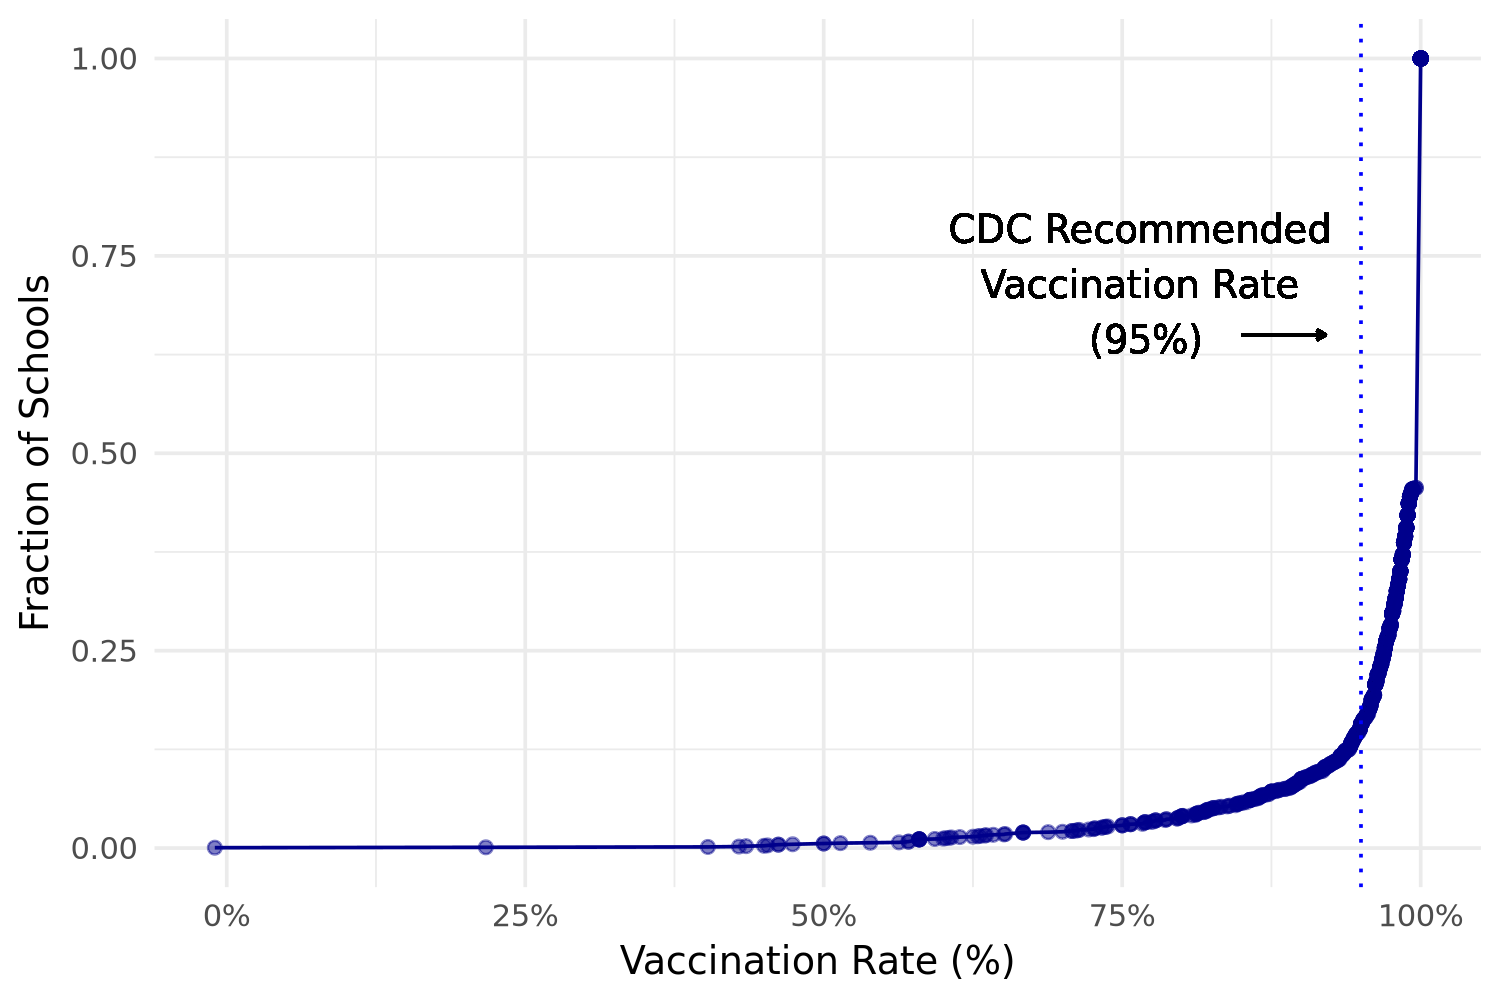

In [92]:
options(repr.plot.width = 6, repr.plot.height = 4)
ecdf = measles_data %>%
    filter(state == "North Carolina") %>%
    arrange(overall) %>%
    mutate(cumulative_dist = cume_dist(overall))

ggplot(ecdf, aes(x=overall/100, y=cumulative_dist)) + 
    geom_point(color = "darkblue", alpha = 0.5) + 
    geom_line(color = "darkblue") +
    geom_vline(xintercept = 0.95, linetype="dotted", color = "blue") + 
    scale_x_continuous(labels = scales::percent_format()) +
    theme_minimal() +
    geom_text(aes(x=0.77, y= 0.75, label="\nCDC Recommended \nVaccination Rate \n(95%)")) +
    geom_segment(aes(x = 0.85, y = 0.65, xend = 0.92, yend = 0.65), 
               arrow = arrow(length = unit(0.1, "cm"))) +
    labs( x= "Vaccination Rate (%)", y = "Fraction of Schools")

(My solution is below if you want to peek 👀. Uncomment the code, change the cell to `markdown`, and exectute it. I used `geom_text_repel` from [ggrepel](https://cran.r-project.org/web/packages/ggrepel/vignettes/ggrepel.html) fo the annotation.)

![](https://github.com/chuckpr/BIOS512/blob/main/assignments/2023/measles-chart.png?raw=true)

Is the median vaccination rate for NC schools above the CDC recommended target?

In [102]:
measles_data %>%
    filter(state == "North Carolina") %>%
    filter(overall >=0) %>%
    summarize(median(overall))

median(overall)
<dbl>
100


Yes, the median vaccination rate for schools is 100%, which is above the CDC recommended target